___
# Atividade: Modelos probabilísticos discretos e Dados
___

## Aula 10

**Referência de Leitura:**
1. Magalhães e Lima (7ª. Edição): Seções 3.2 e 3.3

**Hoje:**
1.	Descrever modelos discretos quanto aos resultados teóricos.
2.	Explicar a utilização de modelos probabilísticos no contexto da literatura estatística.
3.	Contrastar resultados teóricos e empíricos.
4.	Fechamento do conteúdo.

**Próxima aula:**
1. Leitura prévia necessária: Magalhães e Lima (7ª. Edição): Seção 5.1 (pág. 137) e Seção 5.2 (pág. 146).
___

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import math

from scipy import stats #importa apenas as funções de estatísticas da biblioteca SciPy.
import itertools #importante para gerar todos os resultados possíveis!!


___
## <font color='blue'>Exercício 1</font>

Um resistor de 100K Ohms comprado na Santa Efigênia tem probabilidade de falha de 5%, segundo um fabricante ruim.

Ainda, por suposição, admita que os resistores falhem de forma independente entre si.

Um aluno de engenharia compra um pacote contendo $n$ resistores.

1. Assuma $n=3$ e faça os itens a seguir.
  1. Monte o espaço amostral que combine todos os resultados possíveis de Falha e não Falha desses $n$ resistores. Ainda, calcule a probabilidade de cada resultado do espaço amostral acontecer.
  2. Se $Y$ representa o número de resistores que falham em um pacotinho com $n$ resistores, então construa a distribuição de probabilidades de $Y$.
  3. Calcule a média e o desvio padrão de $Y$. Interprete os resultados.
  4. Utilizando o modelo probabilístico da distribuição Binomial, encontre a distribuição de probabilidades de cada possível valor de $Y$. Calcule também $E(X)$ e $Var(X)$. Compare com as distribuições de probabilidades obtidas nos itens anteriores e discuta porque esses valores são iguais ou diferentes!
   
2. Assuma $n=7$ e repita os itens A) a D) anteriores. No caso de $n=7$ ou maiores quantidades de resistores em um pacotinho, qual a viabilidade de construir a distribuição de probabilidades do número de resistores com defeitos quando $n$ não é pequeno seguindo os itens de A) a C)?
    
> 

> **DISTRIBUIÇÃO BINOMIAL - TEORIA:**

> É responsável por modelar uma variável $Y$ definida pelo Número de sucessos em $n$ tentativas, cuja probabilidade de sucesso é dada por $p$. Assim, dizemos que $Y$~$Bin(n,p)$ e lê-se: $Y$ segue uma distribuição binomial com $n$ tentativas e $p$ como probabilidade de sucesso. 

> A função de probabilidade nesse caso é dada por:
$P(Y=y)=\left(
\begin{array}{c}
    n \\
    y
\end{array}\right) p^y (1-p)^{(n-y)}$

> Para um experimento ter as probabilidade dos números de sucessos modeladas por uma distribuição Binomial, o mesmo precisa ter as seguintes propriedades:
* é uma contagem de $n$ repetições (ou tentativas ou ensaios) idênticas;
* cada repetição tem apenas 2 resultados possíveis: um é denominado sucesso e o outro, fracasso;
* a probabilidade de sucesso para cada ensaio é denominada $p$ e será constante em cada repetição. Então, a probabilidade de fracasso $(1-p)$ também não varia de tentativa para tentativa;
* As tentativas são independentes.


> **DISTRIBUIÇÃO BINOMIAL - PYTHON:** <sup> [https://en.wikipedia.org/wiki/SciPy]

> Algumas funções úteis para desenvolver seu código: <sup> [http://docs.scipy.org/doc/scipy-0.16.1/reference/generated/scipy.stats.binom.html]
* $P(Y=y)$: `stats.binom.pmf(y, n, p)`
* $P(Y\leq y)$: `stats.binom.cdf(y, n, p)`
* $E(Y)$ e $Var(Y)$: `stats.binom.stats(n, p, moments='mv')`


In [3]:
#item 1
n=3
#F=Funcionar N=Não Funcionar
possibilidades = ["F", "N"]
prob = {"F":0.95, "N":0.05}
arranjos = itertools.product(possibilidades, repeat = n)
espaço_amostral = list(arranjos)

In [4]:
espaço_amostral

[('F', 'F', 'F'),
 ('F', 'F', 'N'),
 ('F', 'N', 'F'),
 ('F', 'N', 'N'),
 ('N', 'F', 'F'),
 ('N', 'F', 'N'),
 ('N', 'N', 'F'),
 ('N', 'N', 'N')]

In [5]:
prob_linhas = []

for res in espaço_amostral:
    p = 1.0
    for e in res:
        p*=prob[e]
    prob_linhas.append(p)
    print("Probabilidade de ",res," é igual a ","%3.5f"%p)

Probabilidade de  ('F', 'F', 'F')  é igual a  0.85737
Probabilidade de  ('F', 'F', 'N')  é igual a  0.04512
Probabilidade de  ('F', 'N', 'F')  é igual a  0.04512
Probabilidade de  ('F', 'N', 'N')  é igual a  0.00238
Probabilidade de  ('N', 'F', 'F')  é igual a  0.04512
Probabilidade de  ('N', 'F', 'N')  é igual a  0.00238
Probabilidade de  ('N', 'N', 'F')  é igual a  0.00238
Probabilidade de  ('N', 'N', 'N')  é igual a  0.00013


In [6]:
valores_Y = {}
for i in range(len(espaço_amostral)):
    y = espaço_amostral[i].count("N")
    if y in valores_Y:
        valores_Y[y] += prob_linhas[i]
    else:
        valores_Y[y] = prob_linhas[i]

In [7]:
print("Distribuição de probabilidades da variável aleatória (Y) - número de falhas")
print('')
for y in valores_Y:
    print("Para Y =", y, " Probabilidade", "%6.5f "%valores_Y[y])

Distribuição de probabilidades da variável aleatória (Y) - número de falhas

Para Y = 0  Probabilidade 0.85737 
Para Y = 1  Probabilidade 0.13537 
Para Y = 2  Probabilidade 0.00713 
Para Y = 3  Probabilidade 0.00013 


In [8]:
media = 0
for i in valores_Y:
    media += i*valores_Y[i]
print('A media é de', "%6.5f"%media)

A media é de 0.15000


In [9]:
variancia = 0
for i in valores_Y:
    variancia += ((i - media)**2)*valores_Y[i]
desvio_padrao = math.sqrt(variancia)
print('O desvio padrão é de', "%6.5f"%desvio_padrao)

O desvio padrão é de 0.37749


In [10]:
 stats.binom.stats(3, 0.05, moments='mv')

(array(0.15000000000000002), array(0.14250000000000002))

In [11]:
n=7
#F=Funcionar N=Não Funcionar
possibilidades = ["F", "N"]
prob = {"F":0.95, "N":0.05}
arranjos = itertools.product(possibilidades, repeat = n)
espaço_amostral = list(arranjos)

In [12]:
espaço_amostral

[('F', 'F', 'F', 'F', 'F', 'F', 'F'),
 ('F', 'F', 'F', 'F', 'F', 'F', 'N'),
 ('F', 'F', 'F', 'F', 'F', 'N', 'F'),
 ('F', 'F', 'F', 'F', 'F', 'N', 'N'),
 ('F', 'F', 'F', 'F', 'N', 'F', 'F'),
 ('F', 'F', 'F', 'F', 'N', 'F', 'N'),
 ('F', 'F', 'F', 'F', 'N', 'N', 'F'),
 ('F', 'F', 'F', 'F', 'N', 'N', 'N'),
 ('F', 'F', 'F', 'N', 'F', 'F', 'F'),
 ('F', 'F', 'F', 'N', 'F', 'F', 'N'),
 ('F', 'F', 'F', 'N', 'F', 'N', 'F'),
 ('F', 'F', 'F', 'N', 'F', 'N', 'N'),
 ('F', 'F', 'F', 'N', 'N', 'F', 'F'),
 ('F', 'F', 'F', 'N', 'N', 'F', 'N'),
 ('F', 'F', 'F', 'N', 'N', 'N', 'F'),
 ('F', 'F', 'F', 'N', 'N', 'N', 'N'),
 ('F', 'F', 'N', 'F', 'F', 'F', 'F'),
 ('F', 'F', 'N', 'F', 'F', 'F', 'N'),
 ('F', 'F', 'N', 'F', 'F', 'N', 'F'),
 ('F', 'F', 'N', 'F', 'F', 'N', 'N'),
 ('F', 'F', 'N', 'F', 'N', 'F', 'F'),
 ('F', 'F', 'N', 'F', 'N', 'F', 'N'),
 ('F', 'F', 'N', 'F', 'N', 'N', 'F'),
 ('F', 'F', 'N', 'F', 'N', 'N', 'N'),
 ('F', 'F', 'N', 'N', 'F', 'F', 'F'),
 ('F', 'F', 'N', 'N', 'F', 'F', 'N'),
 ('F', 'F', 

In [13]:
prob_linhas = []

for res in espaço_amostral:
    p = 1.0
    for e in res:
        p*=prob[e]
    prob_linhas.append(p)
    print("Probabilidade de ",res," é igual a ","%3.5f"%p)

Probabilidade de  ('F', 'F', 'F', 'F', 'F', 'F', 'F')  é igual a  0.69834
Probabilidade de  ('F', 'F', 'F', 'F', 'F', 'F', 'N')  é igual a  0.03675
Probabilidade de  ('F', 'F', 'F', 'F', 'F', 'N', 'F')  é igual a  0.03675
Probabilidade de  ('F', 'F', 'F', 'F', 'F', 'N', 'N')  é igual a  0.00193
Probabilidade de  ('F', 'F', 'F', 'F', 'N', 'F', 'F')  é igual a  0.03675
Probabilidade de  ('F', 'F', 'F', 'F', 'N', 'F', 'N')  é igual a  0.00193
Probabilidade de  ('F', 'F', 'F', 'F', 'N', 'N', 'F')  é igual a  0.00193
Probabilidade de  ('F', 'F', 'F', 'F', 'N', 'N', 'N')  é igual a  0.00010
Probabilidade de  ('F', 'F', 'F', 'N', 'F', 'F', 'F')  é igual a  0.03675
Probabilidade de  ('F', 'F', 'F', 'N', 'F', 'F', 'N')  é igual a  0.00193
Probabilidade de  ('F', 'F', 'F', 'N', 'F', 'N', 'F')  é igual a  0.00193
Probabilidade de  ('F', 'F', 'F', 'N', 'F', 'N', 'N')  é igual a  0.00010
Probabilidade de  ('F', 'F', 'F', 'N', 'N', 'F', 'F')  é igual a  0.00193
Probabilidade de  ('F', 'F', 'F', 'N',

In [14]:
"%3.5f"%sum(prob_linhas)

'1.00000'

In [15]:
valores_Y = {}
for i in range(len(espaço_amostral)):
    y = espaço_amostral[i].count("N")
    if y in valores_Y:
        valores_Y[y] += prob_linhas[i]
    else:
        valores_Y[y] = prob_linhas[i]

print("Distribuição de probabilidades da variável aleatória (Y) - número de falhas")
print('')
for y in valores_Y:
    print("Para Y =", y, " Probabilidade", "%6.10f "%valores_Y[y])

Distribuição de probabilidades da variável aleatória (Y) - número de falhas

Para Y = 0  Probabilidade 0.6983372961 
Para Y = 1  Probabilidade 0.2572821617 
Para Y = 2  Probabilidade 0.0406234992 
Para Y = 3  Probabilidade 0.0035634648 
Para Y = 4  Probabilidade 0.0001875508 
Para Y = 5  Probabilidade 0.0000059227 
Para Y = 6  Probabilidade 0.0000001039 
Para Y = 7  Probabilidade 0.0000000008 


In [16]:
media = 0
for i in valores_Y:
    media += i*valores_Y[i]
print('A media é de', "%6.2f"%media)

A media é de   0.35


In [17]:
variancia = 0
for i in valores_Y:
    variancia += ((i - media)**2)*valores_Y[i]
desvio_padrao = math.sqrt(variancia)
print('O desvio padrão é de', "%6.5f"%desvio_padrao)

O desvio padrão é de 0.57663


In [18]:
 stats.binom.stats(7, 0.05, moments='mv')

(array(0.35000000000000003), array(0.3325))

___
## <font color='blue'>Exercício 2</font> 
### <font color='red'>**Check para dia 21/03 INDIVIDUAL **</font>

Esse exercício irá explorar uma modelagem de dados reais.

> **Confira alguns itens obrigatórios verificados durante a vistoria do Detran**

> *Todos os veículos, novos ou velhos, precisam passar por uma vistoria todos os anos. (...) O motorista precisa estar atento a alguns itens obrigatórios. Tudo deve funcionar perfeitamente, apresentar bom estado de conservação e estar dentro do prazo de validade.*

> <sup>Fonte: http://extra.globo.com/noticias/brasil/transito-seguro/confira-alguns-itens-obrigatorios-verificados-durante-vistoria-do-detran-10190355.html</sup>

Essa matéria lista 14 itens que são inspecionados pelo Detran, dentre os quais têm-se: extintor de incêndio deve estar dentro do prazo de validade; pneus devem estar em bom estado de conservação; buzina deve funcionar perfeitamente; e cintos de segurança para todos os ocupantes do carro. Se, no final das contas, todos os 14 itens estiverem funcionando perfeitamente, o motorista irá feliz para casa assegurado de que seu carro está sem problemas com a vistoria.

1. A base de dados `Carros.txt` apresenta, para cada um dos três mil carros de passeio vistoriados, duas informações: tipo de carro (1: Popular e 2: Não Popular) e quantidade de itens vistoriados em não conformidade (que pode variar de 0 a 14). 
    1. Considerando todos os carros, analise a quantidade de itens vistoriados em não conformidade. Pela tabela de frequências relativas, calcule a média e variância dessa quantidade. Interprete-os.
    2. Assuma que a variável *Quantidade de itens em não conformidade* possa ser ajustada pelo modelo Binomial com parâmetros $n=14$ e $p=0,10$. Interprete esses parâmetros para o problema em questão e, ainda, discuta se as propriedades da distribuição Binomial estão satisfeitas para o problema aqui me questão.
    
    **Independente da sua resposta anterior, considere que a distribuição binomial seja adequada para modelar a variável de interesse nos próximos itens!**
    3. Utilizando o método `stats.binom.pmf`, obtenha a probabilidade de cada uma das quantidades de itens em não conformidade quando $n=14$ e $p=0,10$. Calcule o valor esperado e a variância da quantidade de itens em não conformidade utilizando o método `stats.binom.stats` e via resultado da Tabela 4.4 do Magalhães e Lima (pág. 125).
    4. Compare as probabilidades teóricas com as frequências relativas observadas nos dados. Para isso, tem-se, por exemplo, as duas opções abaixo para comparar se os resultados empíricos se encaixam com o modelo teórico proposto. 
        - A primeira opção gráfica contrasta a frequência relativa e a probabilidade teórica para uma determinada quantidade de itens em não conformidade! Vide Figura 3.4 do livro Magalhães e Lima (pág. 87). Ou seja, essa opção contrasta a frequência relativa em um valor de $y$ e a probabilidade pontual $P(Y=y)$.
        - A segunda contrasta a frequência relativa acumulada com a probabilidade acumulada até determinada quantidade de itens em não conformidade. Ou seja, compara a frequência relativa acumulada até $y$ com a probabilidade acumulada $P(Y\leq y)$.
    Construa os gráficos de acordo com as duas opções e refine sua conclusão quanto ao uso do modelo teórico para ajustar a variável em questão!
    5. Na prática, qual a necessidade de um modelo probabilístico já que se têm os dados observados?
    6. Considerando apenas os carros populares, o modelo Binomial com parâmetros $n=14$ e $p=0,10$ é adequado para ajustar a variável Quantidade de itens em não conformidade? Se sim, justifique; caso não, sugira novos valores para os parâmetros da distribuição ajuste aos dados.

In [19]:
import os
print('Esperamos trabalhar no diretório')
print(os.getcwd())
carros = pd.read_table('Carros.txt', sep=' ')

Esperamos trabalhar no diretório
C:\Users\Felipe Giorgi\Desktop\3° Semestre\DP - Ciência dos Dados\CD1S17\APS\APS3


In [41]:
carros.head()

,Tipo,Quantidade
1,1,0
2,1,2
3,1,2
4,1,3
5,1,1


In [28]:
D_Q = carros.Quantidade.value_counts(True).reindex([0,1,2,3,4,5,6,7,8])*100
D_Q

0    28.800000
1    31.666667
2    22.133333
3    10.833333
4     4.633333
5     1.566667
6     0.266667
7     0.066667
8     0.033333
Name: Quantidade, dtype: float64

In [30]:
carros.Quantidade.mean()

1.3713333333333333

In [31]:
carros.Quantidade.var()

1.5799715460709343

O mais comum é existir apenas um item irregular, já que sua frequencia corresponde a 31%. A media de 1,37 nos diz que o número de irregularidades por carro tambem não é muito alto.

In [32]:
n = 14

for i in range(n+1):
    print("Para Y =", i, "a probabilidade = " "%6.9f "%stats.binom.pmf(i, 14, 0.1))

Para Y = 0 a probabilidade = 0.228767925 
Para Y = 1 a probabilidade = 0.355861216 
Para Y = 2 a probabilidade = 0.257010878 
Para Y = 3 a probabilidade = 0.114227057 
Para Y = 4 a probabilidade = 0.034902712 
Para Y = 5 a probabilidade = 0.007756158 
Para Y = 6 a probabilidade = 0.001292693 
Para Y = 7 a probabilidade = 0.000164151 
Para Y = 8 a probabilidade = 0.000015959 
Para Y = 9 a probabilidade = 0.000001182 
Para Y = 10 a probabilidade = 0.000000066 
Para Y = 11 a probabilidade = 0.000000003 
Para Y = 12 a probabilidade = 0.000000000 
Para Y = 13 a probabilidade = 0.000000000 
Para Y = 14 a probabilidade = 0.000000000 


In [33]:
esp, var = stats.binom.stats(14, 0.1, moments = 'mv')

print ('Pelo método "stats.binom.stats":')
print ('E(X) =', esp)
print ('Var(X) =', var)

Pelo método "stats.binom.stats":
E(X) = 1.4000000000000001
Var(X) = 1.2600000000000002


In [34]:
print ('Pelo método da tabela 4.4 do livro:')
print ('E(X) =', 14*0.1)
print ('Var(X) =', 14*0.1*(1-0.1))

Pelo método da tabela 4.4 do livro:
E(X) = 1.4000000000000001
Var(X) = 1.2600000000000002


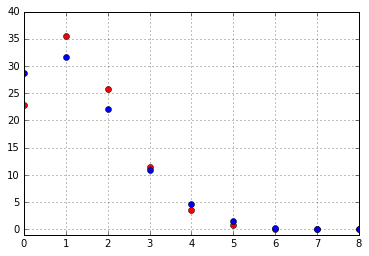

In [35]:
prob = []
for i in range (9):
    prob.append(stats.binom.pmf(i,14,0.1)*100)

plt.plot(prob, 'or')
plt.plot(D_Q, 'ob')
plt.ylim(-1,40)
plt.grid()

A necessidade de um modelo problistico se da quando a analise de uma amostra chega a ser inviavel, pelo seu tamanho.

In [44]:
popular = carros[(carros.Tipo == 1)]
D_Qpop = popular.Quantidade.value_counts(True).reindex([0,1,2,4,5,6,7,8])*100
print ("E(X)",popular.Quantidade.mean())
print ("Var(X)",popular.Quantidade.var())
print()
prob = []
for i in range (9):
    prob.append(stats.binom.pmf(i,n,p))
    
esp, var = stats.binom.stats (14,0.1, moments = 'mv')

print ('E(X) binomial:', esp )
print ('Var(X) binomial:', var )
print()

esp, var = stats.binom.stats (14,0.13, moments = 'mv')
print ('E(X) binomial ajustado:', esp )
print ('Var(X) binomial ajustado:', var )

E(X) 1.8344444444444445
Var(X) 1.6668507195355984

E(X) binomial: 1.4000000000000001
Var(X) binomial: 1.2600000000000002

E(X) binomial ajustado: 1.82
Var(X) binomial ajustado: 1.5834000000000001


___
## <font color='blue'>Exercício 3</font>

### <font color='red'>**Publicar no github até dia 21/03 INDIVIDUAL **</font>

Esse exercício irá explorar modelos de distribuição de Poisson.

Uma fábrica produz determinado veículo. O gerente de vendas fechou um negócio que implica na produção de pelo menos 110 unidades nos próximos dois meses. Para isso, será construída uma nova linha de montagem com capacidade para produzir em média 50 veículos por mês (considere meses de 30 dias). A linha funcionará ininterruptamente. Além disso, apenas um veículo é produzido por vez. Considere que um modelo Poisson seja adequado para a quantidade de veículos produzidos.
   1. Qual a probabilidade  da produção ser igual a 100 veículos nos próximos dois meses?
   2. Qual a probabilidade  da produção ser de pelo menos 100 veículos nos próximos dois meses?
   3. Qual a probabilidade da produção ser entre 100 e 110 veículos nos próximos dois meses?
   4. Se forem produzidos de pelo menos 100 veículos no próximo mês, qual a probabilidade do gerente cumprir a meta negociada?
   5. Caso o prazo seja cumprido, o lucro será da ordem de $250$ mil, caso não seja, o lucro cai para $200$ mil. Qual é o lucro esperado e seu desvio-padrão?

**Observação:** Explore os comandos de `stats.poisson`. <sup>[http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html]


# 1.

In [46]:
print('A probabilidade é de',stats.poisson.pmf(100,100)*100)

A probabilidade é de 3.98609968091


# 2.

In [51]:
print('A probabilidade é de', stats.poisson.cdf(100, 100)*100)

A probabilidade é de 52.656219853


# 3.

In [50]:
print('A probabilidade é de', stats.poisson.cdf(110, 100)*100 - stats.poisson.cdf(99, 100)*100)

A probabilidade é de 36.6161449837


# 4.

In [52]:
print('A probabilidade é de', stats.poisson.cdf(110, 100)*100)

A probabilidade é de 85.2862651558
